<a href="https://colab.research.google.com/github/marshanabilah/recommendation-system/blob/main/rec_system_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
df_ratings=pd.read_csv("/content/drive/MyDrive/dataset/ratings_Beauty_cut.csv")
df_ratings

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
993,A3S5CEM6TF7I8S,9788078893,1.0,1396656000
994,A20LSQZJPJHB0H,9788078907,5.0,1399075200
995,A3317L1113QN7O,978807894X,5.0,1387843200
996,A3ABTLXPQP73TB,978807894X,3.0,1273276800


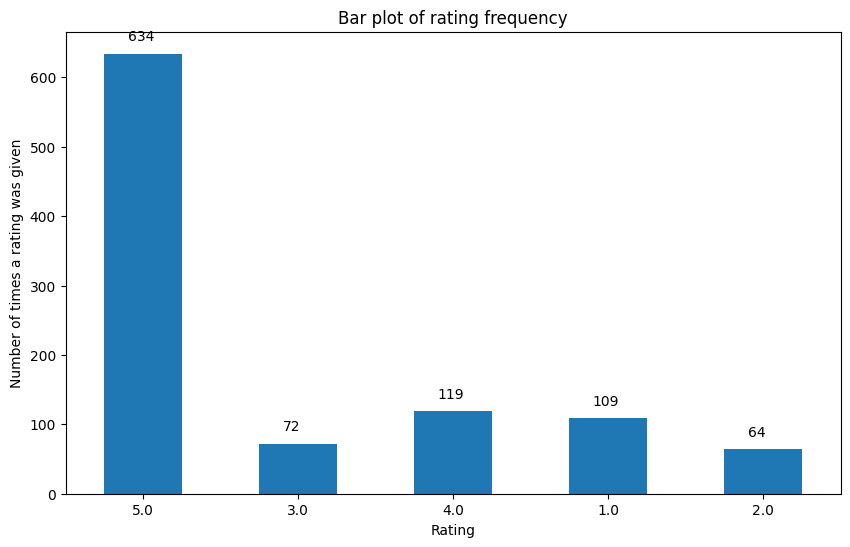

In [ ]:
df_ratings['Rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(df_ratings['Rating'].value_counts(sort=False))
r4 = [1,2,3,4,5]
for i in range(len(label)):
  plt.text(x = r4[i]-1.1 , y = label[i]+19, s = label[i], size =10)


In [ ]:
avg_highly_rated_products = df_ratings.groupby(['ProductId']).agg({"Rating":"mean"})['Rating'].sort_values(ascending=False)
avg_highly_rated_products = avg_highly_rated_products.to_frame()

In [ ]:
avg_highly_rated_products.head(20)

,Rating
ProductId,
0205616461,5.0
1304622223,5.0
9788075584,5.0
9788074049,5.0
9788074405,5.0
9788073883,5.0
1304622193,5.0
1304622452,5.0
1304622428,5.0


In [ ]:
print("Number of products with 5 stars rating on average: ", len(avg_highly_rated_products[avg_highly_rated_products['Rating'] == 5.0]))
print("Number of products with above 4 stars and below 5 starts rating on average: ", len(avg_highly_rated_products[(avg_highly_rated_products['Rating'] >= 4.0) & (avg_highly_rated_products['Rating'] < 5.0)]))

Number of products with 5 stars rating on average:  108
Number of products with above 4 stars and below 5 starts rating on average:  65


In [ ]:
df_ratings.groupby(['ProductId']).agg({"Rating":"sum"})['Rating'].sort_values(ascending=False)

,Rating
ProductId,
9746427962,189.0
9788072216,154.0
9788071198,138.0
9759091062,125.0
7806397051,115.0
...,...
6117043058,1.0
1304622665,1.0
4057362797,1.0


Text(0, 0.5, 'Number of times a user bought the products')

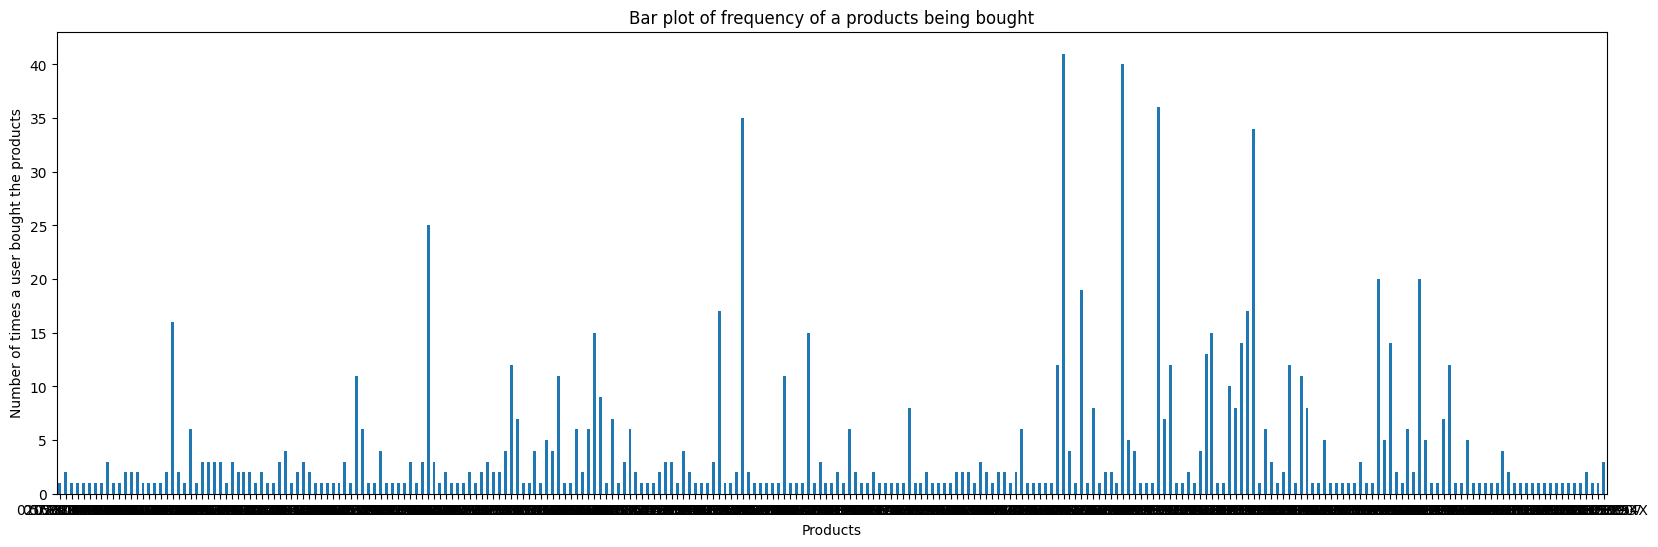

In [ ]:
df_ratings['ProductId'].value_counts(sort=False).plot(kind='bar' ,figsize=(20,6), use_index = True, rot=0)
plt.title('Bar plot of frequency of a products being bought')
plt.xlabel('Products')
plt.ylabel('Number of times a user bought the products')

In [ ]:
# user-item matrix approach

user_item_matrix = df_ratings.pivot_table(index='ProductId', columns='UserId', values='Rating').fillna(0)
user_item_matrix

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A10205RFE66H1R,A104D62WJII6KP,A108HJD2ESJXUY,A10GKM76NOQLGE,A10R4813UIW6GH,A10REFE1TW3ZVT,...,AYI1LDJYGG0ZK,AYM7E80UCJX7I,AYTK85H56WQ5F,AYYB9EFFG2GVA,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZLYAJ8XE443K,AZWRTJPN7NXT,AZYQEFB9Y5N22
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788078389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9788078885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9788078893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cf_knn_model=NearestNeighbors(metric='cosine',algorithm='brute', n_neighbors=10, n_jobs=-1)
cf_knn_model.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=10)

In [ ]:
def product_recommender(product_id, matrix, cf_model, n_recs):
  cf_knn_model.fit(user_item_matrix)
  distances, indices = cf_knn_model.kneighbors(matrix[product_id], n_neighbors=n_recs)
  product_rec_ids = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]

  cf_recs = []
  for i in product_rec_ids:
    cf_recs.append({"ProductId": user_item_matrix.index[i[0]], "Distance": i[1]})

  df = pd.DataFrame(cf_recs, index = range(1, n_recs))
  return df

In [ ]:
n_recs = 10
product_recommender('9788078389', user_item_matrix, cf_knn_model, n_recs)

KeyError: '9788078389'